In [ ]:
Perform EDA(Exploratory Data Analysis) on dataset "Sample super market"

Problem statement : as a business manager, try to find out the weak areas where you can work to make a profit

qus: What all business problem you can derive by exploring the data?

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn
import seaborn as sns

     |████████████████████████████████| 285 kB 2.8 MB/s eta 0:00:01


In [66]:
url = "https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view"
path = "https://drive.google.com/uc?export=download&id="+url.split('/')[-2]
data = pd.read_csv(path)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [44]:
data.shape

(9994, 13)

In [68]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [69]:
data = data.drop(['Country','Postal Code','Discount'],axis=1)

In [ ]:
----------------------EDA Category-Wise-------------------

In [48]:
category_group

,Category,Sub-Category,Sales,Quantity,Profit
0,Furniture,Bookcases,503.859633,3.807018,-15.230509
1,Furniture,Chairs,532.332420,3.818476,43.095894
2,Furniture,Furnishings,95.825668,3.723093,13.645918
3,Furniture,Tables,648.794771,3.890282,-55.565771
4,Office Supplies,Appliances,230.755710,3.710300,38.922758
5,Office Supplies,Art,34.068834,3.768844,8.200737
6,Office Supplies,Binders,133.560560,3.922521,19.843574
7,Office Supplies,Envelopes,64.867724,3.566929,27.418019
8,Office Supplies,Fasteners,13.936774,4.211982,4.375660
9,Office Supplies,Labels,34.303055,3.846154,15.236962


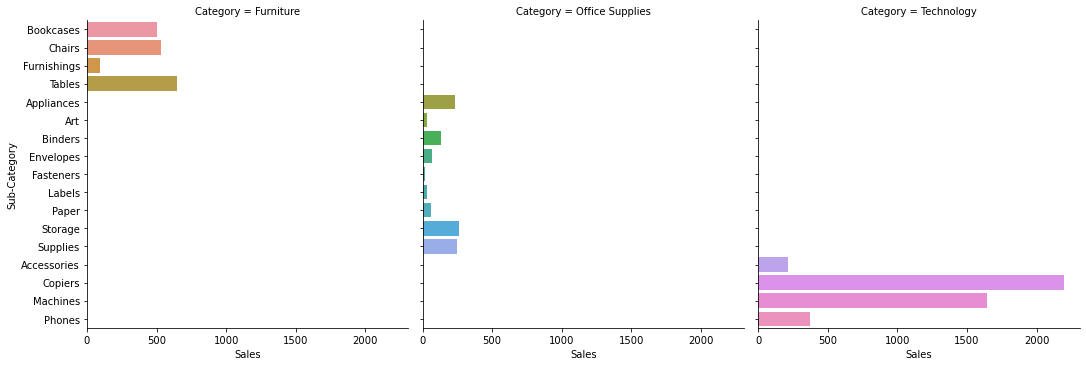

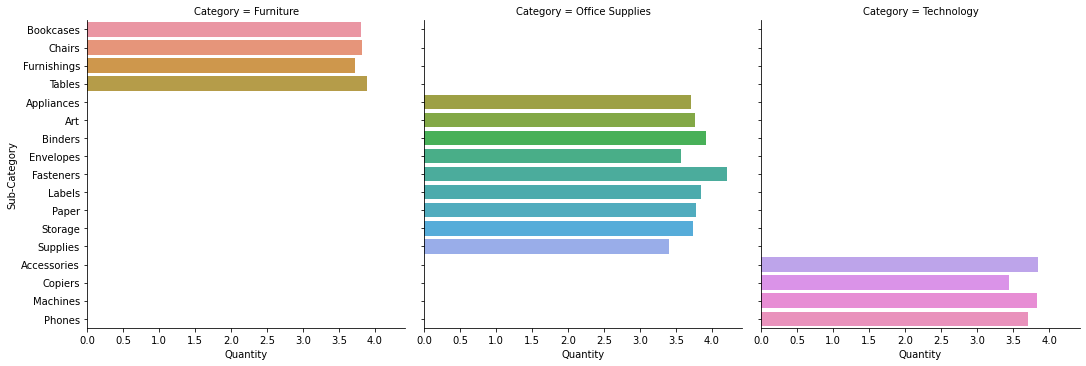

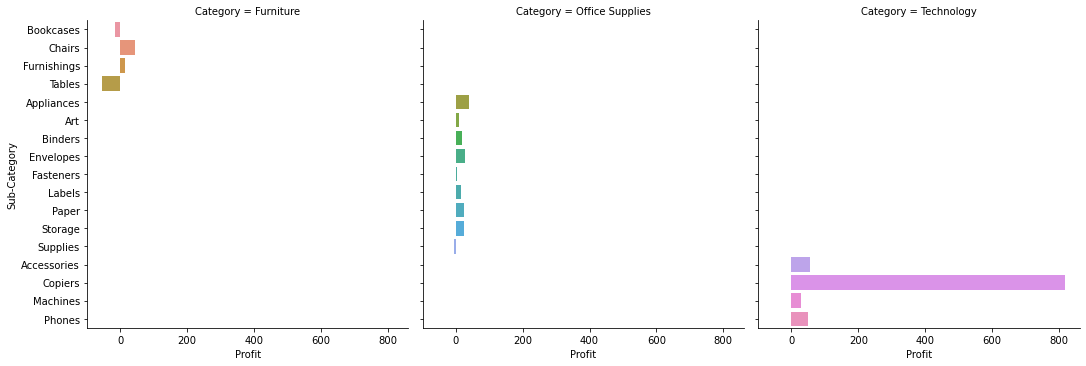

In [52]:
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

In [ ]:
From these graphs, we can conclude that


--In Office Supplies category, there is a very minimal profit in all sub-categories.
--In technology category, Copiers and Machines are sold the most.
--In Furniture category, Bookcases and Tables are incurring a lose.
--In technology category, Copiers provide the most profit among all others.
--In technology category, Sales are more than other two category.
--Quantity of products are almost sold in equal amount in each category.

In [ ]:
------------EDA Segment-Wise------------

In [54]:
segment_group

,Segment,Sales,Quantity,Profit
0,Consumer,223.733644,3.760547,25.836873
1,Corporate,233.823300,3.843709,30.456667
2,Home Office,240.972041,3.782389,33.818664


Text(0.5, 1.0, 'Segment-Wise Profit Gained')

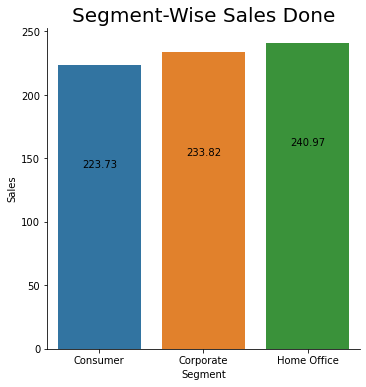

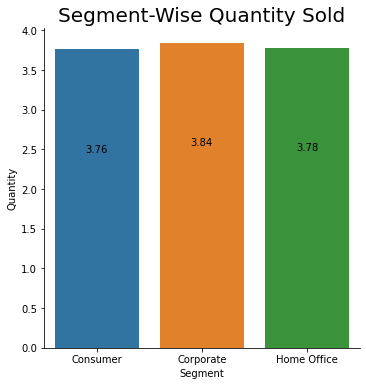

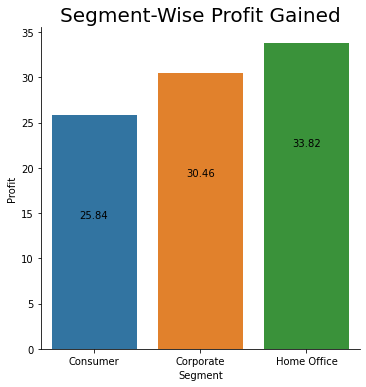

In [55]:
x = sns.catplot(x="Segment", y="Sales", data=segment_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Sales Done", fontsize=20)

y = sns.catplot(x="Segment", y="Quantity", data=segment_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Quantity Sold", fontsize=20)

z = sns.catplot(x="Segment", y="Profit", data=segment_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Profit Gained", fontsize=20)


In [ ]:
From these graphs, we can conclude that

All types of Segments have shown almost same number of sales.
All types of Segments have shown almost same number of quantity sold.
Profit gained in the Home Office segment is higher comparing other two segments and Consumer Segment being the lowest.

In [ ]:
------------EDA Region-Wise--------

In [56]:
region_group.head(10)

,Region,Sales,Quantity,Profit
0,Central,215.772661,3.779595,17.092709
1,East,238.336110,3.728230,32.135808
2,South,241.803645,3.832716,28.857673
3,West,226.493233,3.829535,33.849032


<Figure size 1008x504 with 0 Axes>

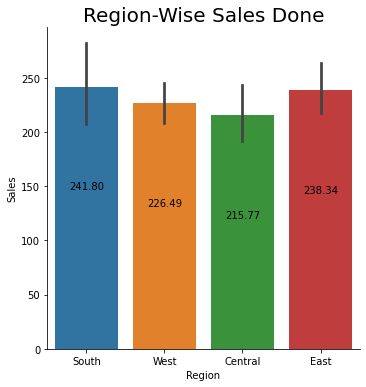

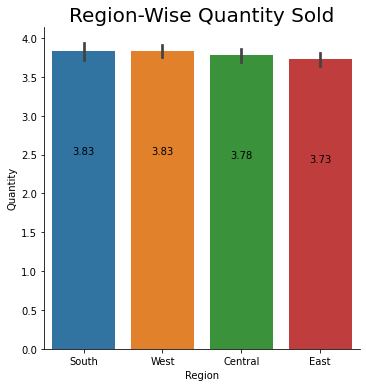

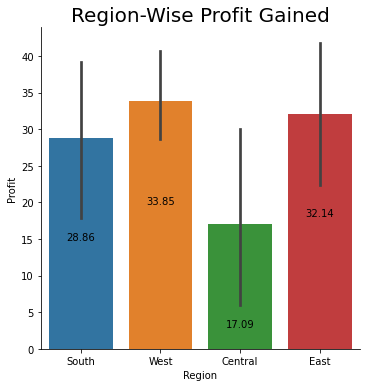

In [57]:
fig = plt.figure(figsize=(14,7))
a = sns.catplot(x='Region',
                y='Sales',
                data=data,
                kind='bar')
for ax in a.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Sales Done", fontsize=20)

b = sns.catplot(x='Region',
                y='Quantity',
                data=data,
                kind='bar')
for ax in b.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Quantity Sold", fontsize=20)

c = sns.catplot(x='Region',
                y='Profit',
                data=data,
                kind='bar')
for ax in c.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Profit Gained", fontsize=20)
plt.show()

In [ ]:
From these graphs, we can conclude that

Sales are more in Southern and Eastern part of US.
Quantity of products sold in all the regions are almost same and not much of difference.
Profit gained in Western part of US is comparatively higher followed by Eastern part, Southern part then Central part of US.B

In [ ]:
---------------EDA State-Wise---------------

In [58]:
state_group

,State,Sales,Quantity,Profit
0,Alabama,319.846557,4.196721,94.865989
1,Arizona,157.508933,3.848214,-15.303235
2,Arkansas,194.635500,4.000000,66.811452
3,California,228.729451,3.831584,38.171608
4,Colorado,176.418231,3.807692,-35.867351
5,Connecticut,163.223866,3.426829,42.823071
6,Delaware,285.948635,3.822917,103.930988
7,District of Columbia,286.502000,4.000000,105.958930
8,Florida,233.612815,3.600522,-8.875461
9,Georgia,266.825217,3.831522,88.315453


In [59]:
sorted_sales = state_group.sort_values(['Sales'], 
                                        ascending=False)[:10]
sorted_quantity = state_group.sort_values(['Quantity'], 
                                        ascending=False)[:10]
sorted_profit = state_group.sort_values(['Profit'], 
                                        ascending=False)[:10]

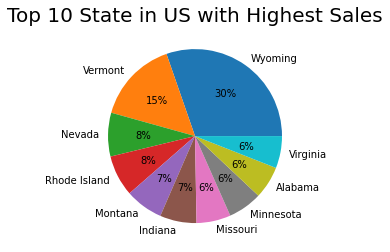

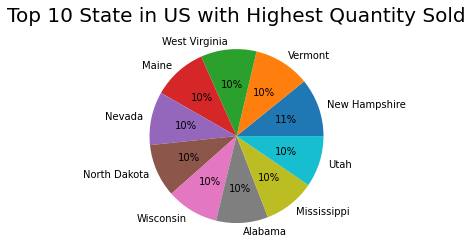

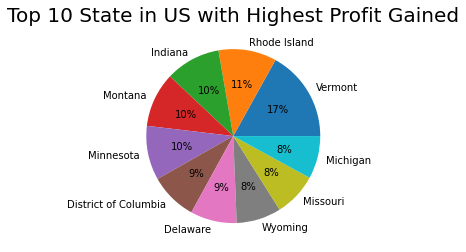

In [60]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = sorted_profit.Profit

sales_labels = sorted_sales.State
quantity_labels = sorted_quantity.State
profit_labels = sorted_profit.State

plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Sales", fontsize=20)
plt.show()

plt.pie(quantity_values, labels=quantity_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Quantity Sold", fontsize=20)
plt.show()

plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Profit Gained", fontsize=20)
plt.show()

In [ ]:
From these graphs, we can conclude that

Wyoming sales are highest among all but with a profit of only 8%.
Almost all top 10 states have same quantity sold
Vermont State gained the highest profit among all.

In [ ]:
------------------EDA Ship Mode Wise-------------------

In [61]:
shipmode_group

,Ship Mode,Sales,Quantity,Profit
0,First Class,228.497024,3.701560,31.839948
1,Same Day,236.396179,3.609576,29.266591
2,Second Class,236.089239,3.816452,29.535545
3,Standard Class,227.583067,3.819873,27.494770


Text(0.5, 1.0, 'Shop Mode-Wise Profit Gained')

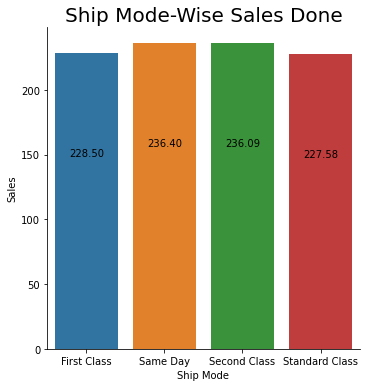

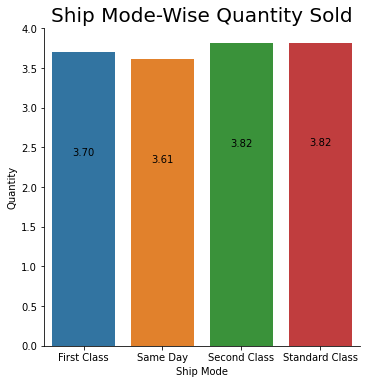

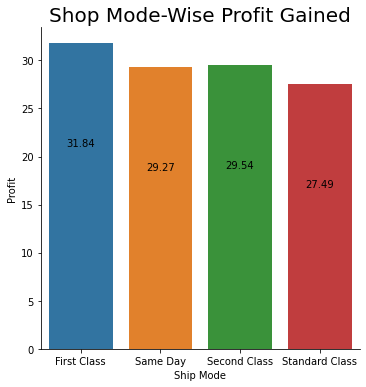

In [62]:
x = sns.catplot(x="Ship Mode", y="Sales", data=shipmode_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode-Wise Sales Done", fontsize=20)

y = sns.catplot(x="Ship Mode", y="Quantity", data=shipmode_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode-Wise Quantity Sold", fontsize=20)

z = sns.catplot(x="Ship Mode", y="Profit", data=shipmode_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Shop Mode-Wise Profit Gained", fontsize=20)

In [ ]:
Business problems that can be derived by looking into the data?



--How much is the sales, profit and quantity sold varies region-wise, state-wise and segment-wise, category-wise?
--Which category of items gives the more profit and sold more?
--Which type of mode is suitable for more profit?
--Which country has the highest profit?
--Which region has the highest sales and profit?